# Canonical Analysis

Canonical analysis is typically used when there are two sets of interrelated variables, with the aim of understanding the relationship between the two sets of variables. The primary objective of canonical analysis is to identify linear combinations, known as canonical variates, that maximize the correlation between the two sets of variables.

In canonical analysis, the two sets of variables are referred to as the "dependent variables" and the "independent variables." The goal is to find a linear combination of the independent variables that best predicts or explains the variation in the dependent variables.

Canonical analysis allows for the examination of the underlying structure and relationships between the sets of variables. It helps uncover the dimensions or latent factors that explain the covariation between the two sets of variables. These canonical variates can provide insights into the patterns, associations, and dependencies between the two sets, facilitating a deeper understanding of the relationship between them.

The results of canonical analysis are typically presented in terms of canonical correlation coefficients, canonical loadings, and canonical weights. These measures provide information about the strength and direction of the relationship between the canonical variates and the original variables

We will use a simple 2D array as an example. But in practice, of course we will have larger datasets.

In [72]:
from sklearn.cross_decomposition import CCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Data Prepare
np.random.seed(42)
num_points = 60
row = 15
col = 4
X = np.random.rand(num_points).reshape(row,col)  # Set data X
Y = np.random.rand(num_points).reshape(row,col)  # Set data Y

We can use the CCA module from sklearn.cross_decomposition to do the Canonical Computation and get the new components based on the n_components argument given by us.

In [87]:

# Canonical Analysis
cca = CCA(n_components=1)
cca.fit(X, Y)

cca.coef_.shape
# Get transformed Data
X_c, Y_c = cca.transform(X, Y)

# Print the Results
print(f"Transformed X Shape:{X_c.shape}")
print(f"Transformed Y Shape:{Y_c.shape}")
print("Transformed X first 5 data:")
print(X_c[0:6])
print("Transformed Y first 5 data:")
print(Y_c[0:6])


Transformed X Shape:(15, 1)
Transformed Y Shape:(15, 1)
Transformed X first 5 data:
[[-0.03951495]
 [ 0.04975444]
 [-1.84470638]
 [-0.50758003]
 [ 0.48318446]
 [ 0.07088378]]
Transformed Y first 5 data:
[[-0.08306192]
 [ 0.06822751]
 [-2.03847424]
 [-1.89207503]
 [ 1.79191654]
 [ 0.39753424]]


In [88]:
cc_res = pd.DataFrame({
    "CCX": X_c[:, 0],
    "CCY": Y_c[:, 0],
})
cc_res.head()

,CCX,CCY
0,-0.039515,-0.083062
1,0.049754,0.068228
2,-1.844706,-2.038474
3,-0.507580,-1.892075
4,0.483184,1.791917


We can compute the correlation by using np.corrcoef()

In [89]:
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.76373679],
       [0.76373679, 1.        ]])

After Compute the correlation, we can see the pair variable are having a high enough correlation

Text(0.5, 1.0, 'component correlation = 0.76')

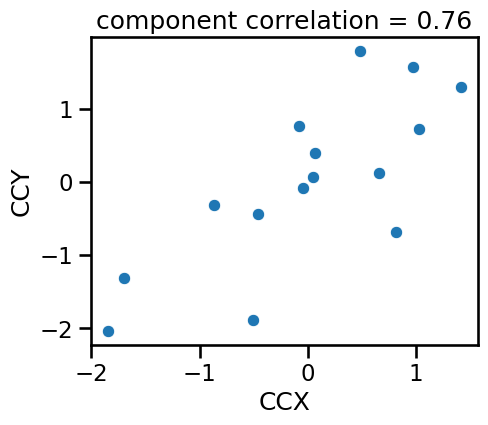

In [91]:
sns.set_context("talk", font_scale=1.0)
plt.figure(figsize=(5,4))
sns.scatterplot(x="CCX",
                y="CCY", 
                data=cc_res)
plt.title("component correlation = %.2f" %np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])
